In [383]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip
from datetime import datetime, timedelta
import glob

### Looking at Davis Strait Mooring Data File

In [123]:
file_path = '../../notebook_input/Davis_MicroCAT_BI2_2004_25m_L2.nc'
ds = nc4.Dataset(file_path)
lon = ds.variables['longitude'][0]
lat = ds.variables['latitude'][0]
Theta = ds.variables['sea_water_temperature'][:]
Salt = ds.variables['sea_water_practical_salinity'][:]
Time = ds.variables['time'][:]
ds.close()

In [124]:
print(lon, lat)

-61.20667 66.65701


In [125]:
time_dt = nc4.num2date(Time[:], units="days since 1950-01-01")
time_dt = nc4.num2date(
    Time[:],
    units="days since 1950-01-01",                         # "days since 1950-01-01"
    calendar=getattr(Time, 'calendar', 'standard'),
    only_use_cftime_datetimes=False               # <- key line
)
print(time_dt)

[real_datetime(2004, 9, 27, 22, 30)
 real_datetime(2004, 9, 27, 23, 0, 0, 3)
 real_datetime(2004, 9, 27, 23, 29, 59, 999997) ...
 real_datetime(2005, 9, 10, 17, 29, 59, 999997)
 real_datetime(2005, 9, 10, 18, 0)
 real_datetime(2005, 9, 10, 18, 30, 0, 3)]


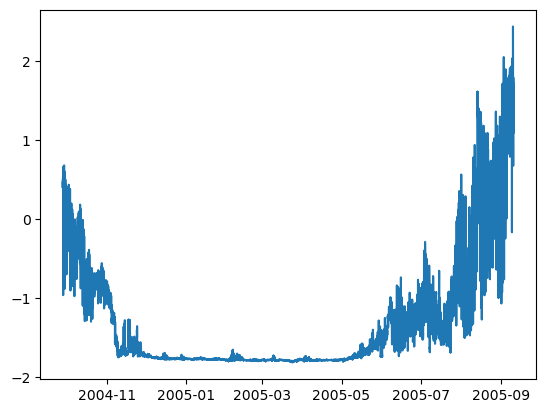

In [126]:
plt.plot(time_dt, Theta)

# Data Exploration

In [148]:
delX = 1/12
delY = 1/12
xgOrigin = -68
ygOrigin = 62
n_rows = 100
n_cols = 240
Nr = 50

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY//2, delY)
XC, YC = np.meshgrid(xc, yc)
print(np.shape(XC))
print(np.shape(YC))

model_folder = '/Users/cool/Workspace/MLML/ms274_fall2025/Project/low_res/run/'

(100, 240)
(100, 240)


## Looking at first timestep file 
Checking first timestep of Theta for assessment

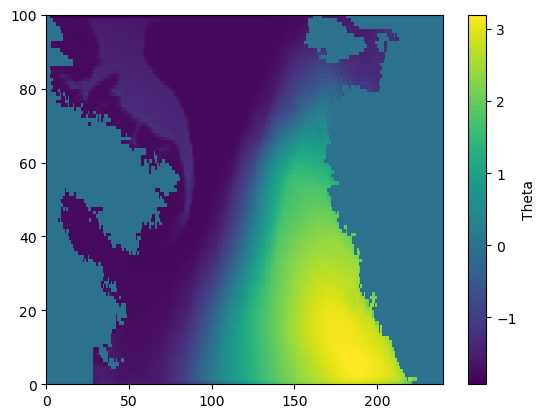

In [263]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.0000000576.data'), '>f4').reshape((2, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, :, :])
plt.colorbar(label='Theta')

## Looking at final timestep file 
Checking final timestep of Theta for assessment

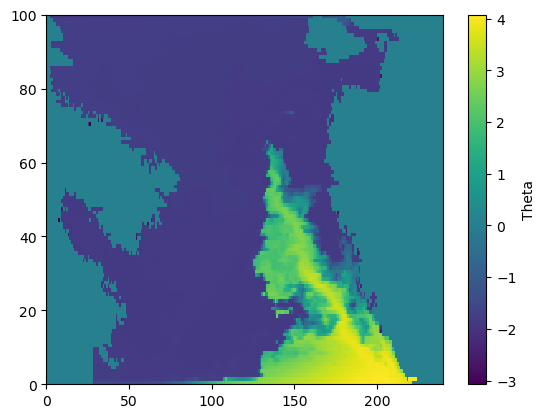

In [250]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.0000198720.data'), '>f4').reshape((2, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, :, :])
plt.colorbar(label='Theta')

## Looking at first timestep file 
Checking first timestep of Theta monthly for assessment, and overlaying mooring observational data locations

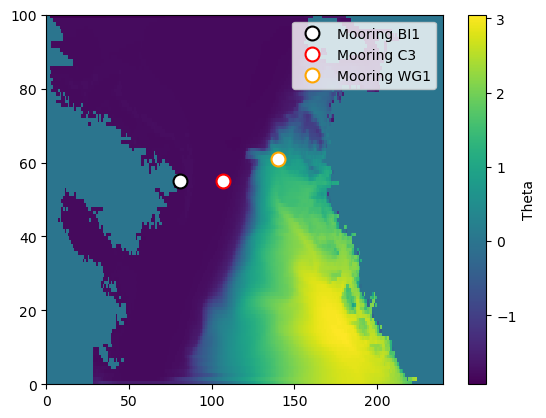

In [316]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'TS_3D_mon_mean', 'TS_3D_mon_mean.0000009216.data'), '>f4').reshape((2, 50, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, 0, :, :])
plt.colorbar(label='Theta')
plt.plot(81, 55, 'wo', markersize=10, markeredgecolor='black', markeredgewidth=1.5, label=f'Mooring BI1')
plt.plot(107, 55, 'wo', markersize=10, markeredgecolor='red', markeredgewidth=1.5, label=f'Mooring C3')
plt.plot(140, 61, 'wo', markersize=10, markeredgecolor='orange', markeredgewidth=1.5, label=f'Mooring WG1')
plt.legend()
plt.show()


## Looking at final timestep file 
Checking final timestep of Theta monthly at 50m depth for assessment, and overlaying mooring observational data locations

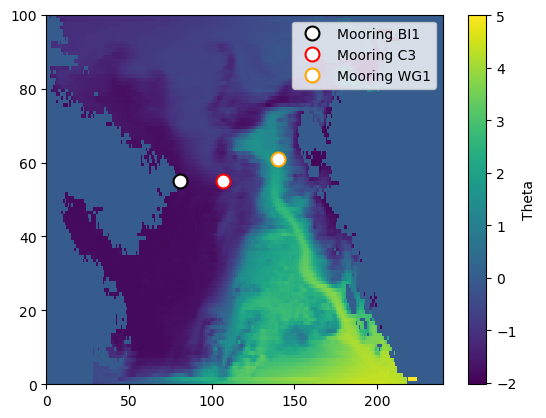

In [338]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'TS_3D_mon_mean', 'TS_3D_mon_mean.0000183744.data'), '>f4').reshape((2, 50, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, 5, :, :])
plt.colorbar(label='Theta')

plt.plot(81, 55, 'wo', markersize=10, markeredgecolor='black', markeredgewidth=1.5, label=f'Mooring BI1')
plt.plot(107, 55, 'wo', markersize=10, markeredgecolor='red', markeredgewidth=1.5, label=f'Mooring C3')
plt.plot(140, 61, 'wo', markersize=10, markeredgecolor='orange', markeredgewidth=1.5, label=f'Mooring WG1')
plt.legend()
plt.show()


## Sea Ice assessment

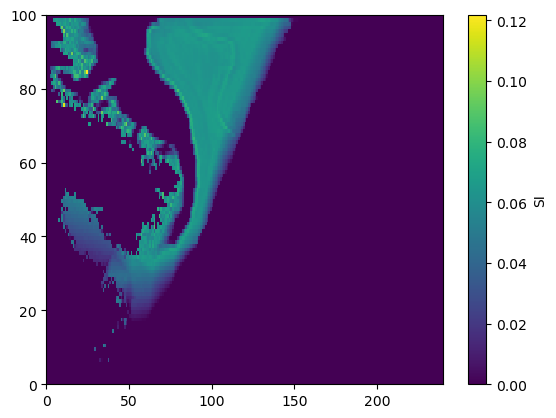

In [340]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'SI_daily_snap', 'SI_daily_snap.0000000288.data'), '>f4').reshape((5, 1, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, 0, :, :])
plt.colorbar(label='SI')

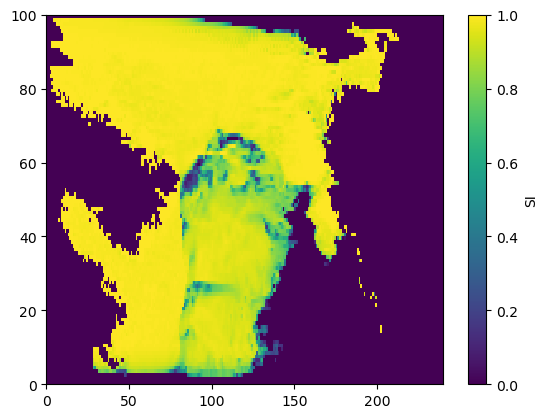

In [341]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'SI_daily_snap', 'SI_daily_snap.0000104544.data'), '>f4').reshape((5, 1, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, 0, :, :])
plt.colorbar(label='SI')

## heat flux

Text(0.5, 1.0, 'heat transport, northward')

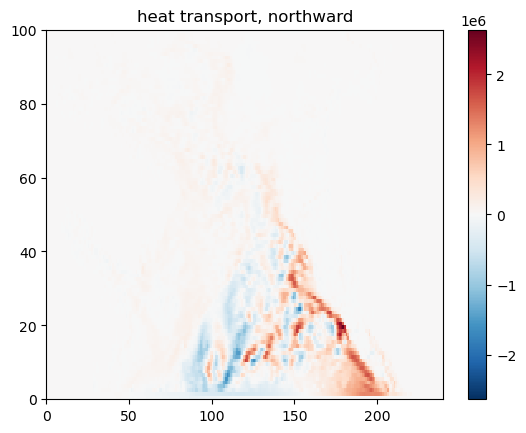

In [347]:
# grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000000576.data'), '>f4').reshape((2, 50, n_rows, n_cols))
grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000198720.data'), '>f4').reshape((2, 50, n_rows, n_cols))
np.shape(grid)

net_transport_xy = np.sum(grid, axis=1)
adv_y_int = net_transport_xy[1, :, :]
max_val = np.max(np.abs(adv_y_int))  
plt.pcolormesh(adv_y_int, cmap='RdBu_r', vmin=-max_val, vmax=max_val, shading='auto')
plt.colorbar()
plt.title('heat transport, northward')

Text(0.5, 1.0, 'heat transport, eastward')

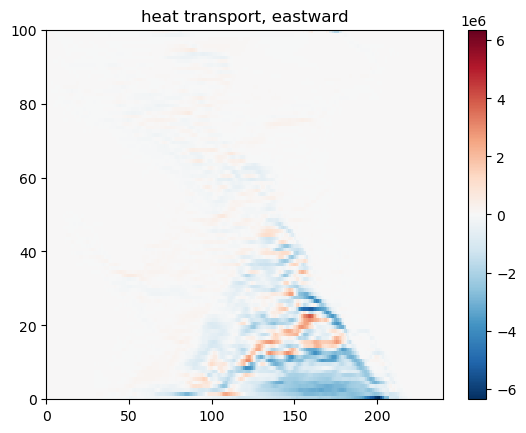

In [348]:
# grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000000576.data'), '>f4').reshape((2, 50, n_rows, n_cols))
grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000198720.data'), '>f4').reshape((2, 50, n_rows, n_cols))
np.shape(grid)

net_transport_xy = np.sum(grid, axis=1)
adv_y_int = net_transport_xy[0, :, :]
max_val = np.max(np.abs(adv_y_int))  
plt.pcolormesh(adv_y_int, cmap='RdBu_r', vmin=-max_val, vmax=max_val, shading='auto')
plt.colorbar()
plt.title('heat transport, eastward')

# Movie Creation
Code used for looping through theta, sea ice, and heat transport files to make videos. 

In [326]:
start_date = datetime(1997, 1, 15) 
delta_t = 150  # seconds

# define a plot_frame function which takes in two arguments:
#    - the file path of a uvel file to read
#    - the file path where the plot will be stored
def plot_frame(data_path, image_path, date_label): 

    fig = plt.figure(figsize = (10,6))

    # u_grid = np.fromfile(data_path, '>f4').reshape((2,n_rows, n_cols))
    u_grid = np.fromfile(data_path, '>f4').reshape((5,n_rows, n_cols))
    plt.pcolormesh(u_grid[0,:,:], cmap=cm.ice, vmin=0, vmax=1)
    # plt.pcolormesh(u_grid[0,:,:], cmap=cm.thermal, vmin=-2, vmax=5)

    # u_grid = np.fromfile(data_path, '>f4').reshape((2,50, n_rows, n_cols))
    # net_transport_xy = np.sum(u_grid, axis=1)
    # adv_y_int = net_transport_xy[0, :, :]
    # max_val = 5e6
    # plt.pcolormesh(adv_y_int, cmap='RdBu_r', vmin=-max_val, vmax=max_val, shading='auto')
    # plt.colorbar(label='Net Heat Transport (DegC m³/s)')
    # plt.title(f'Zonal Heat Transport  - {date_label}')
    
    # add a colorbar
    plt.colorbar(label='SI Area %')
    # plt.colorbar(label='degrees C')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    # plt.title(f'Theta - {date_label}')
    plt.title(f'SI Area - {date_label}')

    # show the figure
    plt.savefig(image_path)
    plt.close(fig)# make a list that will hold the paths
file_list = []

# loop through each day of the year
#sf surf low res
# for day in range(576, 391104 + 1, 576):
#si low res
for day in range(288, 390816 + 1, 576):
# high res loop
# for day in range(1800, 86400 + 1, 1800):
    # --- Calculate the Date ---
    # Time elapsed = current iteration * seconds per step
    time_elapsed = timedelta(seconds=day * delta_t)
    current_date = start_date + time_elapsed
    
    # Format as string: "1997-01-16", etc.
    date_str = current_date.strftime('%Y-%m-%d')

    # identify the data file path
    # data_path = os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.'+'{:010d}'.format(day)+'.data')
    # data_path = os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.'+'{:010d}'.format(day)+'.data')
    data_path = os.path.join(model_folder, 'diags', 'SI_daily_snap', 'SI_daily_snap.'+'{:010d}'.format(day)+'.data')
    # high_res_model_folder = '/Users/cool/Workspace/MLML/ms274_fall2025/Project/high_res/run/'
    # data_path = os.path.join(high_res_model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.'+'{:010d}'.format(day)+'.data')

    # identify the image file path
    # image_path = os.path.join(model_folder, 'plots', 'TS_daily', 'THETA.'+'{:010d}'.format(day)+'.png')
    # image_path = os.path.join(model_folder, 'plots', 'heat_flux_daily', 'heat_flux_daily.'+'{:010d}'.format(day)+'.png')
    image_path = os.path.join(model_folder, 'plots', 'SI_daily', 'SI_daily.'+'{:010d}'.format(day)+'.png')
    

    # call the plotting function
    plot_frame(data_path, image_path, date_str)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)

In [327]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(model_folder, 'plots', 'SI_daily.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/cool/Workspace/MLML/ms274_fall2025/Project/low_res/run/plots/SI_daily.mp4.
Moviepy - Writing video /Users/cool/Workspace/MLML/ms274_fall2025/Project/low_res/run/plots/SI_daily.mp4



Moviepy - Done !
Moviepy - video ready /Users/cool/Workspace/MLML/ms274_fall2025/Project/low_res/run/plots/SI_daily.mp4


# Comparing to observation data 
Overlaying graphs of my data outputs against different Davis Mooring positions 

Loading Observations for 2005 from 2 files...
Total 2005 points loaded: 17055
Processing 680 model files from diags...


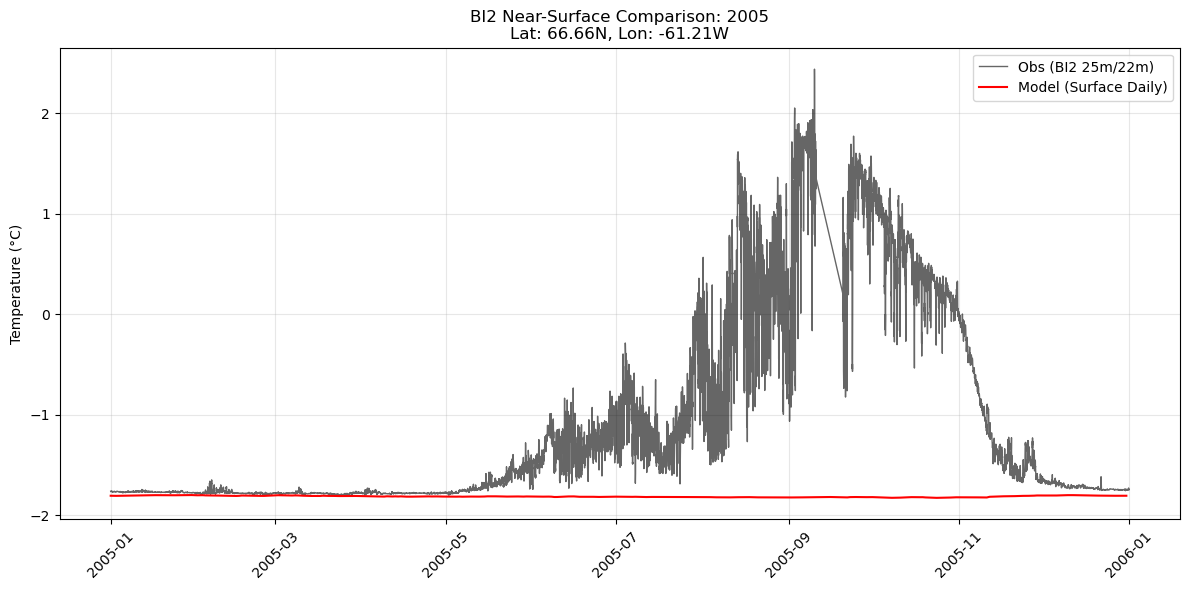

55 81


In [384]:
obs_files = [
    '../../notebook_input/Davis_MicroCAT_BI2_2004_25m_L2.nc',
    '../../notebook_input/Davis_MicroCAT_BI2_2005_22m_L2.nc'
]

diags_path = os.path.join(model_folder, 'diags', 'TS_surf_daily_mean')

model_start_date = datetime(1997, 1, 1)
TARGET_YEAR = 2005
k_index = 0 

# --- 2. LOAD & STITCH OBS (FILTER FOR 2005) ---
all_obs_temps = []
all_obs_dates = []
target_lat, target_lon = None, None

print(f"Loading Observations for {TARGET_YEAR} from {len(obs_files)} files...")

for f in obs_files:
    if not os.path.exists(f):
        print(f"Skipping missing file: {f}")
        continue
        
    ds = nc4.Dataset(f)
    
    # Grab Location from first valid file
    if target_lat is None:
        target_lon = ds.variables['longitude'][0]
        target_lat = ds.variables['latitude'][0]
    
    # Read Data
    temp = ds.variables['sea_water_temperature'][:]
    t_num = ds.variables['time'][:]
    t_units = ds.variables['time'].units
    
    # Robust Date Conversion
    raw_dates = nc4.num2date(t_num, units=t_units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
    
    # Stitch data
    for i, d in enumerate(raw_dates):
        # Convert cftime to python datetime
        if not isinstance(d, datetime):
            d = datetime(d.year, d.month, d.day, d.hour, d.minute)
            
        # FILTER: Only keep data that falls within 2005
        if d.year == TARGET_YEAR:
            all_obs_dates.append(d)
            all_obs_temps.append(temp[i])
            
    ds.close()

# Convert to arrays
all_obs_dates = np.array(all_obs_dates)
all_obs_temps = np.array(all_obs_temps)

# Sort by date to ensure correct plotting order after stitching
if len(all_obs_dates) > 0:
    sort_inds = np.argsort(all_obs_dates)
    all_obs_dates = all_obs_dates[sort_inds]
    all_obs_temps = all_obs_temps[sort_inds]
    print(f"Total 2005 points loaded: {len(all_obs_dates)}")
else:
    print("Warning: No 2005 data found in these files.")

# --- 3. EXTRACT 1997 DAILY MODEL CYCLE (FROM diags) ---
model_daily_clim = {}

# Grid Search
xc = np.arange(xgOrigin + delX/2, xgOrigin + n_cols*delX + delX/2, delX)
yc = np.arange(ygOrigin + delY/2, ygOrigin + n_rows*delY + delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

if target_lon is not None:
    dist = ((XC - target_lon)**2 + (YC - target_lat)**2)**0.5
    row_idx, col_idx = np.unravel_index(np.argmin(dist), dist.shape)
else:
    row_idx, col_idx = 50, 120 # Fallback
    target_lat, target_lon = 66.0, -60.0

# Find files in 'diags'
file_pattern = os.path.join(diags_path, 'TS_surf_daily_mean.*.data')
file_list = sorted(glob.glob(file_pattern))
print(f"Processing {len(file_list)} model files from diags...")

for fpath in file_list:
    try:
        # Get Iteration -> Date -> DOY
        iteration = int(os.path.basename(fpath).split('.')[1])
        file_date = model_start_date + timedelta(seconds=iteration * delta_t)
        doy = file_date.timetuple().tm_yday
        
        # Read Binary
        try:
            # Try 2D Surface Shape
            data = np.fromfile(fpath, '>f4').reshape((2, n_rows, n_cols))
            val = data[0, row_idx, col_idx]
        except ValueError:
            # Fallback 3D Shape
            data = np.fromfile(fpath, '>f4').reshape((2, 50, n_rows, n_cols))
            val = data[0, 0, row_idx, col_idx]
            
        model_daily_clim[doy] = val
    except Exception:
        continue

# --- 4. PREPARE 2005 MODEL OVERLAY ---
plot_model_dates = []
plot_model_temps = []

for doy in sorted(model_daily_clim.keys()):
    if doy == 366: continue
    
    # Create valid 2005 date
    d = datetime(TARGET_YEAR, 1, 1) + timedelta(days=doy - 1)
    plot_model_dates.append(d)
    plot_model_temps.append(model_daily_clim[doy])

# --- 5. PLOTTING ---
plt.figure(figsize=(12, 6))

# Plot Obs (Stitched 2005)
if len(all_obs_dates) > 0:
    plt.plot(all_obs_dates, all_obs_temps, 'k-', linewidth=1, label='Obs (BI2 25m/22m)', alpha=0.6)

# Plot Model Overlay
if len(plot_model_dates) > 0:
    plt.plot(plot_model_dates, plot_model_temps, 'r-', linewidth=1.5, label='Model (Surface Daily)')

plt.title(f'BI2 Near-Surface Comparison: {TARGET_YEAR}\nLat: {target_lat:.2f}N, Lon: {target_lon:.2f}W')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(row_idx, col_idx)

Loading Observations for 2005...
Found 17057 observation points for 2005
Processing 12 monthly files...
Processing 680 daily surface files...


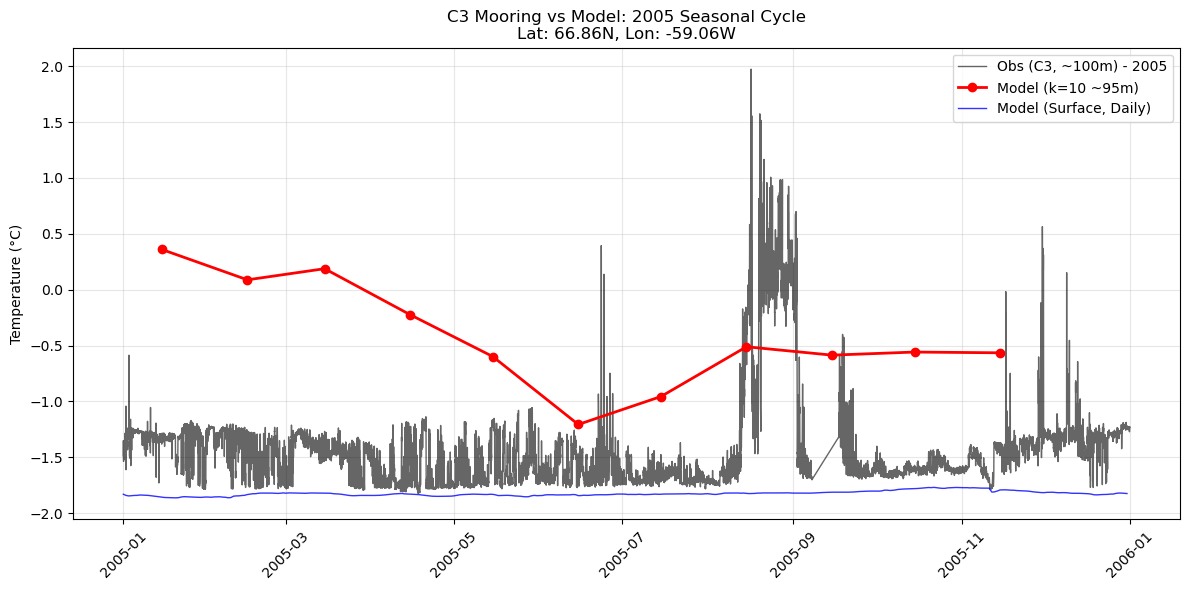

Grid Indices Used: Row 58, Col 107


In [385]:
obs_files = [
    '../../notebook_input/Davis_MicroCAT_C3_2004_93m_L2.nc',
    '../../notebook_input/Davis_MicroCAT_C3_2005_107m_L2.nc'
]

delta_t = 150
model_base_date = datetime(1997, 1, 1)

# Target Year for Plotting
TARGET_YEAR = 2005
k_index = 10  # Approx 95m (for 3D monthly data)

# --- 2. LOAD OBSERVATIONS (2005 Only) ---
obs_temps = []
obs_dates = []
target_lat = None
target_lon = None

print(f"Loading Observations for {TARGET_YEAR}...")

for f in obs_files:
    if not os.path.exists(f):
        continue
    ds = nc4.Dataset(f)
    
    # Grab Location
    if target_lat is None:
        target_lon = ds.variables['longitude'][0]
        target_lat = ds.variables['latitude'][0]
    
    # Read raw data
    temp = ds.variables['sea_water_temperature'][:]
    t_num = ds.variables['time'][:]
    t_units = ds.variables['time'].units
    
    # Robust Date Conversion
    raw_dates = nc4.num2date(t_num, units=t_units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
    
    # Filter for TARGET_YEAR
    for i, d in enumerate(raw_dates):
        # Convert to python datetime if needed
        if not isinstance(d, datetime):
            d = datetime(d.year, d.month, d.day, d.hour, d.minute)
            
        if d.year == TARGET_YEAR:
            obs_dates.append(d)
            obs_temps.append(temp[i])
            
    ds.close()

# Convert lists to arrays
obs_dates = np.array(obs_dates)
obs_temps = np.array(obs_temps)
print(f"Found {len(obs_dates)} observation points for {TARGET_YEAR}")

if target_lon is not None:
    dist = ((XC - target_lon)**2 + (YC - target_lat)**2)**0.5
    row_idx, col_idx = np.unravel_index(np.argmin(dist), dist.shape)
else:
    # Fallback default C3 indices
    row_idx, col_idx = 58, 107
    target_lat, target_lon = 66.86, -59.06

# --- 4. EXTRACT 1997 MODEL DATA (MONTHLY 3D) ---
model_monthly_clim = {}
# Note: Using diags as per your previous request
file_pattern_mon = os.path.join(model_folder, 'diags', 'TS_3D_mon_mean', 'TS_3D_mon_mean.*.data')
file_list_mon = sorted(glob.glob(file_pattern_mon))

print(f"Processing {len(file_list_mon)} monthly files...")
for fpath in file_list_mon:
    try:
        iteration = int(os.path.basename(fpath).split('.')[1])
        file_date = model_base_date + timedelta(seconds=iteration * delta_t)
        m = file_date.month
        
        # Read Binary Data (3D)
        data_block = np.fromfile(fpath, '>f4').reshape((2, Nr, n_rows, n_cols))
        val = data_block[0, k_index, row_idx, col_idx] # Temp at k_index
        
        model_monthly_clim[m] = val
    except Exception:
        continue

# --- 5. EXTRACT 1997 MODEL DATA (DAILY SURFACE) ---
model_daily_clim = {}
file_pattern_daily = os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.*.data')
file_list_daily = sorted(glob.glob(file_pattern_daily))

print(f"Processing {len(file_list_daily)} daily surface files...")
for fpath in file_list_daily:
    try:
        iteration = int(os.path.basename(fpath).split('.')[1])
        file_date = model_base_date + timedelta(seconds=iteration * delta_t)
        doy = file_date.timetuple().tm_yday
        
        # Read Binary Data (Surface)
        # Try 2D first (Vars, Rows, Cols), fallback to 3D (Vars, Depth, Rows, Cols)
        try:
            data_block = np.fromfile(fpath, '>f4').reshape((2, n_rows, n_cols))
            val = data_block[0, row_idx, col_idx]
        except ValueError:
            data_block = np.fromfile(fpath, '>f4').reshape((2, Nr, n_rows, n_cols))
            val = data_block[0, 0, row_idx, col_idx] # Surface k=0
            
        model_daily_clim[doy] = val
    except Exception:
        continue

# --- 6. CREATE OVERLAYS FOR TARGET YEAR ---

# A. Monthly Overlay
plot_mon_dates = []
plot_mon_temps = []
for month in range(1, 13):
    if month in model_monthly_clim:
        d = datetime(TARGET_YEAR, month, 15)
        plot_mon_dates.append(d)
        plot_mon_temps.append(model_monthly_clim[month])

# B. Daily Overlay
plot_daily_dates = []
plot_daily_temps = []
for doy in sorted(model_daily_clim.keys()):
    if doy == 366: continue # Skip leap day for simplicity
    d = datetime(TARGET_YEAR, 1, 1) + timedelta(days=doy - 1)
    plot_daily_dates.append(d)
    plot_daily_temps.append(model_daily_clim[doy])

# --- 7. PLOTTING ---
plt.figure(figsize=(12, 6))

# 1. Obs (2005)
if len(obs_dates) > 0:
    plt.plot(obs_dates, obs_temps, 'k-', linewidth=1.0, label=f'Obs (C3, ~100m) - {TARGET_YEAR}', alpha=0.6)

# 2. Model Monthly (Red)
if len(plot_mon_dates) > 0:
    plt.plot(plot_mon_dates, plot_mon_temps, 'r-o', linewidth=2, label=f'Model (k={k_index} ~95m)')

# 3. Model Surface Daily (Blue)
if len(plot_daily_dates) > 0:
    plt.plot(plot_daily_dates, plot_daily_temps, 'b-', linewidth=1, label='Model (Surface, Daily)', alpha=0.8)

plt.title(f'C3 Mooring vs Model: {TARGET_YEAR} Seasonal Cycle\nLat: {target_lat:.2f}N, Lon: {target_lon:.2f}W')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Grid Indices Used: Row {row_idx}, Col {col_idx}")

Loading Observations for 2005...
Found 17129 observation points for 2005
Processing 12 monthly files...
Processing 680 daily surface files...


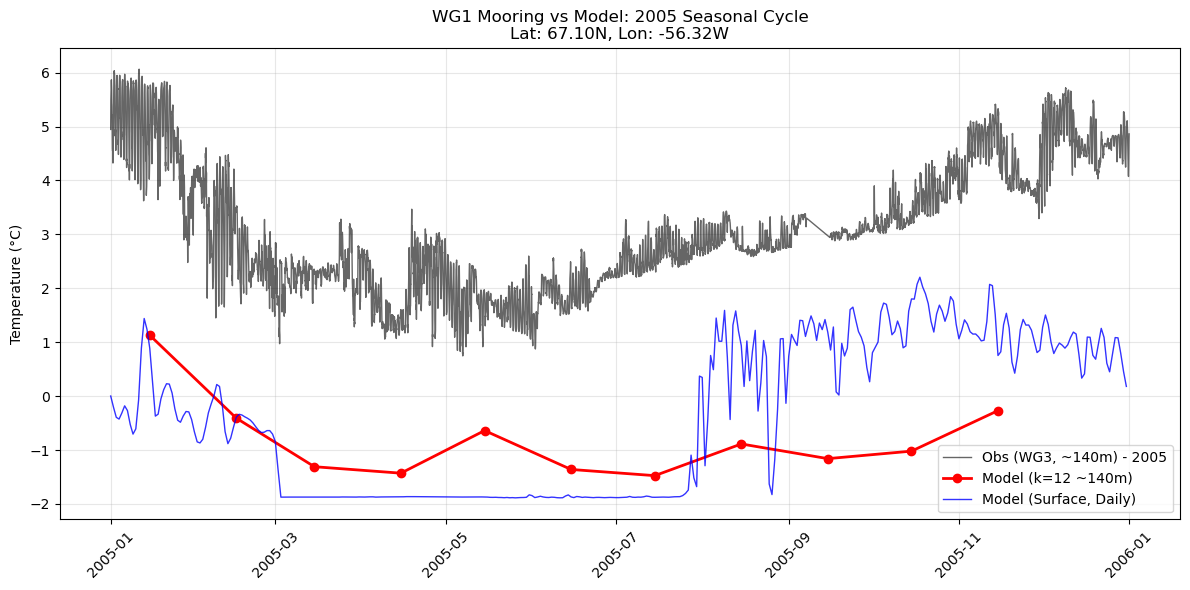

In [379]:
# --- 1. CONFIGURATION ---
obs_files = [
    '../../notebook_input/Davis_MicroCAT_WG1_2004_147m_L2.nc',
    '../../notebook_input/Davis_MicroCAT_WG1_2005_143m_L2.nc' 
]

delta_t = 150
model_base_date = datetime(1997, 1, 1)

# Target Year for Plotting
TARGET_YEAR = 2005
k_index = 12  # Approx 130m

# --- 2. LOAD OBSERVATIONS (2005 Only) ---
obs_temps = []
obs_dates = []
target_lat = None
target_lon = None

print(f"Loading Observations for {TARGET_YEAR}...")

for f in obs_files:
    if not os.path.exists(f):
        continue
    ds = nc4.Dataset(f)
    
    # Grab Location
    if target_lat is None:
        target_lon = ds.variables['longitude'][0]
        target_lat = ds.variables['latitude'][0]
    
    # Read raw data
    temp = ds.variables['sea_water_temperature'][:]
    t_num = ds.variables['time'][:]
    t_units = ds.variables['time'].units
    
    # Robust Date Conversion
    raw_dates = nc4.num2date(t_num, units=t_units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
    
    # Filter for TARGET_YEAR
    for i, d in enumerate(raw_dates):
        # Convert to python datetime if needed
        if not isinstance(d, datetime):
            d = datetime(d.year, d.month, d.day, d.hour, d.minute)
            
        if d.year == TARGET_YEAR:
            obs_dates.append(d)
            obs_temps.append(temp[i])
            
    ds.close()

# Convert lists to arrays
obs_dates = np.array(obs_dates)
obs_temps = np.array(obs_temps)
print(f"Found {len(obs_dates)} observation points for {TARGET_YEAR}")

if target_lon is not None:
    dist = ((XC - target_lon)**2 + (YC - target_lat)**2)**0.5
    row_idx, col_idx = np.unravel_index(np.argmin(dist), dist.shape)
else:
    # Fallback default C3 indices
    row_idx, col_idx = 58, 107
    target_lat, target_lon = 66.86, -59.06

# --- 4. EXTRACT 1997 MODEL DATA (MONTHLY 3D) ---
model_monthly_clim = {}
# Note: Using diags as per your previous request
file_pattern_mon = os.path.join(model_folder, 'diags', 'TS_3D_mon_mean', 'TS_3D_mon_mean.*.data')
file_list_mon = sorted(glob.glob(file_pattern_mon))

print(f"Processing {len(file_list_mon)} monthly files...")
for fpath in file_list_mon:
    try:
        iteration = int(os.path.basename(fpath).split('.')[1])
        file_date = model_base_date + timedelta(seconds=iteration * delta_t)
        m = file_date.month
        
        # Read Binary Data (3D)
        data_block = np.fromfile(fpath, '>f4').reshape((2, Nr, n_rows, n_cols))
        val = data_block[0, k_index, row_idx, col_idx] # Temp at k_index
        
        model_monthly_clim[m] = val
    except Exception:
        continue

# --- 5. EXTRACT 1997 MODEL DATA (DAILY SURFACE) ---
model_daily_clim = {}
file_pattern_daily = os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.*.data')
file_list_daily = sorted(glob.glob(file_pattern_daily))

print(f"Processing {len(file_list_daily)} daily surface files...")
for fpath in file_list_daily:
    try:
        iteration = int(os.path.basename(fpath).split('.')[1])
        file_date = model_base_date + timedelta(seconds=iteration * delta_t)
        doy = file_date.timetuple().tm_yday
        
        # Read Binary Data (Surface)
        # Try 2D first (Vars, Rows, Cols), fallback to 3D (Vars, Depth, Rows, Cols)
        try:
            data_block = np.fromfile(fpath, '>f4').reshape((2, n_rows, n_cols))
            val = data_block[0, row_idx, col_idx]
        except ValueError:
            data_block = np.fromfile(fpath, '>f4').reshape((2, Nr, n_rows, n_cols))
            val = data_block[0, 0, row_idx, col_idx] # Surface k=0
            
        model_daily_clim[doy] = val
    except Exception:
        continue

# --- 6. CREATE OVERLAYS FOR TARGET YEAR ---

# A. Monthly Overlay
plot_mon_dates = []
plot_mon_temps = []
for month in range(1, 13):
    if month in model_monthly_clim:
        d = datetime(TARGET_YEAR, month, 15)
        plot_mon_dates.append(d)
        plot_mon_temps.append(model_monthly_clim[month])

# B. Daily Overlay
plot_daily_dates = []
plot_daily_temps = []
for doy in sorted(model_daily_clim.keys()):
    if doy == 366: continue # Skip leap day for simplicity
    d = datetime(TARGET_YEAR, 1, 1) + timedelta(days=doy - 1)
    plot_daily_dates.append(d)
    plot_daily_temps.append(model_daily_clim[doy])

# --- 7. PLOTTING ---
plt.figure(figsize=(12, 6))

# 1. Obs (2005)
if len(obs_dates) > 0:
    plt.plot(obs_dates, obs_temps, 'k-', linewidth=1.0, label=f'Obs (WG3, ~140m) - {TARGET_YEAR}', alpha=0.6)

# 2. Model Monthly (Red)
if len(plot_mon_dates) > 0:
    plt.plot(plot_mon_dates, plot_mon_temps, 'r-o', linewidth=2, label=f'Model (k={k_index} ~140m)')

# 3. Model Surface Daily (Blue)
if len(plot_daily_dates) > 0:
    plt.plot(plot_daily_dates, plot_daily_temps, 'b-', linewidth=1, label='Model (Surface, Daily)', alpha=0.8)

plt.title(f'WG1 Mooring vs Model: {TARGET_YEAR} Seasonal Cycle\nLat: {target_lat:.2f}N, Lon: {target_lon:.2f}W')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Normalizing northward heat transport to compare between resolution levels 

<>:67: SyntaxWarning: invalid escape sequence '\c'
<>:67: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2286/3775345166.py:67: SyntaxWarning: invalid escape sequence '\c'
  cbar.set_label('Heat Flux Intensity (DegC $\cdot$ m$^2$/s)')


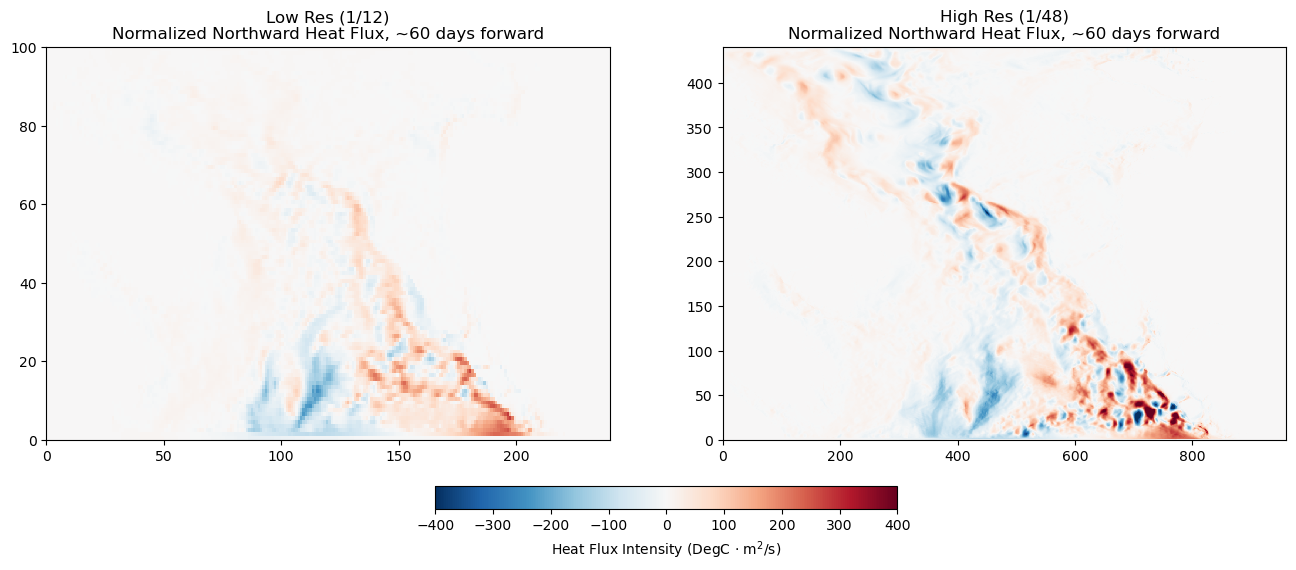

In [375]:
def get_grid_dx(delX, delY, n_rows, n_cols, ygOrigin):
    """Calculates the zonal width (dx) of every grid cell in meters."""
    # Earth Radius
    R_earth = 6371000.0
    deg2rad = np.pi / 180.0
    
    xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
    yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY//2, delY)
    XC, YC = np.meshgrid(xc, yc)
    
    # Calculate dx = R * cos(lat) * d_lon
    # delX (degrees) converted to radians
    dx_meters = (delX * deg2rad) * R_earth * np.cos(YC * deg2rad)
    
    return dx_meters

# low res
lr_params = {
    'filename': os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000034560.data'),
    'delX': 1/12,
    'delY': 1/12,
    'n_rows': 100,
    'n_cols': 240,
    'ygOrigin': 62
}

# high res 
hr_params = {
    'filename': os.path.join('/Users/cool/Workspace/MLML/ms274_fall2025/Project/high_res/run/', 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000084960.data'),
    'delX': 1/48,
    'delY': 1/48,
    'n_rows': 440,
    'n_cols': 960,
    'ygOrigin': 62
}

def process_and_plot(ax, params, label):
    dx = get_grid_dx(params['delX'], params['delY'], params['n_rows'], params['n_cols'], params['ygOrigin'])
    
    filename = params['filename']
    grid = np.fromfile(filename, '>f4').reshape((2, 50, params['n_rows'], params['n_cols']))

    # sum over water column 
    adv_y_int = np.sum(grid[1, :, :, :], axis=0)
    
    # normalize
    advy_normalized = adv_y_int / dx
    
    # Plot
    limit = 400 
    
    im = ax.pcolormesh(advy_normalized, cmap='RdBu_r', vmin=-limit, vmax=limit, shading='auto')
    ax.set_title(f"{label}\nNormalized Northward Heat Flux, ~60 days forward")
    return im

# --- MAIN PLOT EXECUTION ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Low Res
im1 = process_and_plot(ax1, lr_params, "Low Res (1/12)")

# Plot High Res
im2 = process_and_plot(ax2, hr_params, "High Res (1/48)")

if im1:
    cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='horizontal', fraction=0.05, pad=0.1)
    cbar.set_label('Heat Flux Intensity (DegC $\cdot$ m$^2$/s)')

plt.show()